Best Antenna Design (L1,L2,L3,D1,D2): [0.5        0.5        0.5        0.42299345 1.        ]
Best Fitness (Total Signal): 16.42205591893099


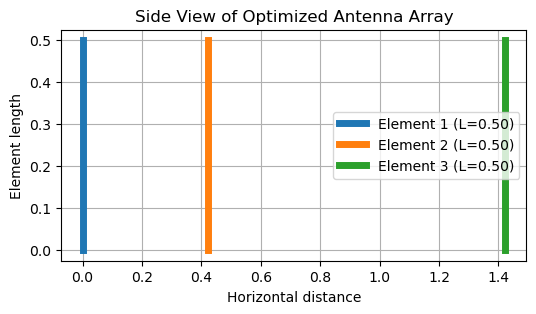

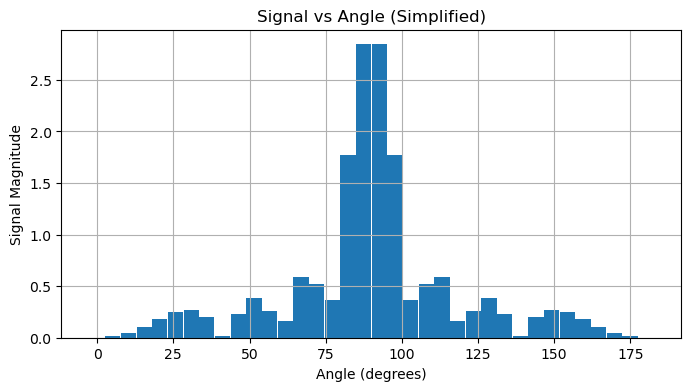

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# -----------------------------
# Fitness function
# -----------------------------
def fitness(x):
    L1, L2, L3, D1, D2 = x
    freq = 2.4e9
    c = 3e8
    wavelength = c / freq
    theta = np.linspace(0, np.pi, 36)  # just 36 angles for simplicity
    
    E1 = np.sin(np.pi * L1 * np.cos(theta) / wavelength) / (np.pi * L1 * np.cos(theta) / wavelength)
    E2 = np.sin(np.pi * L2 * np.cos(theta) / wavelength) / (np.pi * L2 * np.cos(theta) / wavelength)
    E3 = np.sin(np.pi * L3 * np.cos(theta) / wavelength) / (np.pi * L3 * np.cos(theta) / wavelength)
    E1 = np.nan_to_num(E1)
    E2 = np.nan_to_num(E2)
    E3 = np.nan_to_num(E3)
    
    TotalSignal = E1 + E2 + E3
    return np.sum(np.abs(TotalSignal))

# -----------------------------
# Lévy flight
# -----------------------------
def levy(beta=1.5):
    sigma = (math.gamma(1 + beta) * np.sin(np.pi * beta / 2) /
            (math.gamma((1 + beta) / 2) * beta * 2**((beta - 1)/2)))**(1/beta)
    u = np.random.normal(0, sigma, 5)
    v = np.random.normal(0, 1, 5)
    step = u / (np.abs(v)**(1/beta))
    return step

# -----------------------------
# Cuckoo Search
# -----------------------------
def cuckoo_search(n_nests=10, n_iter=20, pa=0.25, alpha=0.5):
    nests = np.random.rand(n_nests, 5)
    nests[:,0:3] = 0.5 + nests[:,0:3]*1.5
    nests[:,3:5] = 0.1 + nests[:,3:5]*0.9
    fitness_vals = np.array([fitness(x) for x in nests])
    best_idx = np.argmax(fitness_vals)
    best_nest = nests[best_idx].copy()
    best_fit = fitness_vals[best_idx]
    
    for t in range(n_iter):
        for i in range(n_nests):
            step = alpha * levy()
            new_nest = nests[i] + step
            new_nest[0:3] = np.clip(new_nest[0:3], 0.5, 2.0)
            new_nest[3:5] = np.clip(new_nest[3:5], 0.1, 1.0)
            j = np.random.randint(n_nests)
            if fitness(new_nest) > fitness_vals[j]:
                nests[j] = new_nest
                fitness_vals[j] = fitness(new_nest)
        n_abandon = int(pa * n_nests)
        worst_idx = np.argsort(fitness_vals)[:n_abandon]
        for idx in worst_idx:
            nests[idx] = np.random.rand(5)
            nests[idx,0:3] = 0.5 + nests[idx,0:3]*1.5
            nests[idx,3:5] = 0.1 + nests[idx,3:5]*0.9
            fitness_vals[idx] = fitness(nests[idx])
        current_best_idx = np.argmax(fitness_vals)
        if fitness_vals[current_best_idx] > best_fit:
            best_nest = nests[current_best_idx].copy()
            best_fit = fitness_vals[current_best_idx]
    return best_nest, best_fit

# -----------------------------
# Run CS
# -----------------------------
best_design, best_value = cuckoo_search()
print("Best Antenna Design (L1,L2,L3,D1,D2):", best_design)
print("Best Fitness (Total Signal):", best_value)

L1, L2, L3, D1, D2 = best_design
x_positions = [0, D1, D1 + D2]
lengths = [L1, L2, L3]

# -----------------------------
# Simple Side View
# -----------------------------
plt.figure(figsize=(6,3))
for i, (x, L) in enumerate(zip(x_positions, lengths)):
    plt.plot([x, x], [0, L], linewidth=5, label=f'Element {i+1} (L={L:.2f})')
plt.xlabel("Horizontal distance")
plt.ylabel("Element length")
plt.title("Side View of Optimized Antenna Array")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Simple Bar Plot of Signal vs Angle
# -----------------------------
theta = np.linspace(0, 180, 36)
freq = 2.4e9
c = 3e8
wavelength = c / freq
E1 = np.sin(np.pi * L1 * np.cos(np.radians(theta)) / wavelength) / (np.pi * L1 * np.cos(np.radians(theta)) / wavelength)
E2 = np.sin(np.pi * L2 * np.cos(np.radians(theta)) / wavelength) / (np.pi * L2 * np.cos(np.radians(theta)) / wavelength)
E3 = np.sin(np.pi * L3 * np.cos(np.radians(theta)) / wavelength) / (np.pi * L3 * np.cos(np.radians(theta)) / wavelength)
E1 = np.nan_to_num(E1)
E2 = np.nan_to_num(E2)
E3 = np.nan_to_num(E3)
TotalSignal = np.abs(E1 + E2 + E3)

plt.figure(figsize=(8,4))
plt.bar(theta, TotalSignal, width=5)
plt.xlabel("Angle (degrees)")
plt.ylabel("Signal Magnitude")
plt.title("Signal vs Angle (Simplified)")
plt.grid(True)
plt.show()
